We will make a simple model first
for the type A customers

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import math

In [5]:
#first we will make a model through linear regression

#importing data
df_1 = pd.read_csv("data_new_customers.csv",encoding='latin-1')
df_1.head(10)  #first ten observations of the data set

,Tax_per_unit_vol,GTO_per_unit_vol,segment,sub_segment,Brand,Sub_Brand,Pack_Type,province,Discount_Total,Premium,Tier 1,Tier 2,RETURNABLE
0,33.880126,338.927445,Entertainment Led,Events,JUPILER,JUPILER PILS,CAN,Hainaut,0.00,0,1,0,0
1,24.050000,258.933333,Institutional,Institutional,JUPILER,JUPILER PILS,KEG,East Flanders,0.00,0,0,1,1
2,21.500000,349.750000,Drink Led,Bar,HOEGAARDEN,HOEGAARDEN ROSEE,BOTTLE,Flemish Brabant,0.00,0,1,0,1
3,5.126582,379.936709,Drink Led,Bar,LEFFE,LEFFE SANS ALCOOL/ALCOHOLVRIJ,BOTTLE,Flemish Brabant,0.00,0,1,0,1
4,24.056000,261.340000,Drink Led,Bar,STELLA ARTOIS,STELLA ARTOIS REGULAR,KEG,Flemish Brabant,0.00,0,1,0,1
5,24.051667,254.280000,Drink Led,Bar,JUPILER,JUPILER PILS,KEG,LiÃ¨ge,385.35,0,1,0,1
6,25.458333,294.166667,Drink Led,Bar,JUPILER,JUPILER PILS,BOTTLE,LiÃ¨ge,0.00,0,0,1,1
7,24.051064,254.973050,Drink Led,Bar,JUPILER,JUPILER PILS,KEG,LiÃ¨ge,0.00,0,0,1,1
8,25.466667,294.166667,Institutional,Institutional,JUPILER,JUPILER PILS,BOTTLE,Limburg,16.12,0,0,1,1
9,25.333333,453.333333,Drink Led,Bar,BELLE VUE,BELLE VUE EXTRA KRIEK,BOTTLE,Walloon Brabant,11.82,0,0,1,1


In [6]:
df_1.shape

(166, 13)

In [7]:
df_1.nunique()

Tax_per_unit_vol    117
GTO_per_unit_vol    104
segment               4
sub_segment           6
Brand                16
Sub_Brand            35
Pack_Type             3
province             10
Discount_Total      124
Premium               2
Tier 1                2
Tier 2                2
RETURNABLE            2
dtype: int64

In [8]:
df_1.describe()

,Tax_per_unit_vol,GTO_per_unit_vol,Discount_Total,Premium,Tier 1,Tier 2,RETURNABLE
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,27.106034,372.993664,121.155361,0.072289,0.228916,0.500000,0.909639
std,12.722948,108.137064,424.509155,0.259750,0.421406,0.501513,0.287566
min,5.126582,13.641645,-449.400000,0.000000,0.000000,0.000000,0.000000
25%,24.050000,302.839286,0.240000,0.000000,0.000000,0.000000,1.000000
50%,25.500000,377.467112,11.815000,0.000000,0.000000,0.500000,1.000000
75%,33.544304,414.450000,38.395000,0.000000,0.000000,1.000000,1.000000
max,75.189873,906.666667,3492.920000,1.000000,1.000000,1.000000,1.000000


In [9]:
df_1.drop(['Brand', 'segment'], axis = 1, inplace = True) #since we are already taking their subsets, these are not required
df_1.head()

,Tax_per_unit_vol,GTO_per_unit_vol,sub_segment,Sub_Brand,Pack_Type,province,Discount_Total,Premium,Tier 1,Tier 2,RETURNABLE
0,33.880126,338.927445,Events,JUPILER PILS,CAN,Hainaut,0.0,0,1,0,0
1,24.050000,258.933333,Institutional,JUPILER PILS,KEG,East Flanders,0.0,0,0,1,1
2,21.500000,349.750000,Bar,HOEGAARDEN ROSEE,BOTTLE,Flemish Brabant,0.0,0,1,0,1
3,5.126582,379.936709,Bar,LEFFE SANS ALCOOL/ALCOHOLVRIJ,BOTTLE,Flemish Brabant,0.0,0,1,0,1
4,24.056000,261.340000,Bar,STELLA ARTOIS REGULAR,KEG,Flemish Brabant,0.0,0,1,0,1


In [10]:
sub_segment= pd.get_dummies(df_1['sub_segment'], drop_first = True)
Sub_Brand= pd.get_dummies(df_1['Sub_Brand'], drop_first = True)
Pack_Type= pd.get_dummies(df_1['Pack_Type'], drop_first = True)
province= pd.get_dummies(df_1['province'], drop_first = True)

data= pd.concat([df_1,sub_segment,Sub_Brand,Pack_Type,province], axis = 1)
data.drop([ 'sub_segment','Sub_Brand','Pack_Type','province'], axis =1, inplace = True)
data.head()

,Tax_per_unit_vol,GTO_per_unit_vol,Discount_Total,Premium,Tier 1,Tier 2,RETURNABLE,Beer bar,Events,Hybrid,...,KEG,Brussels Capital Region,East Flanders,Flemish Brabant,Hainaut,Limburg,LiÃ¨ge,Luxembourg,Walloon Brabant,West Flanders
0,33.880126,338.927445,0.0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,24.050000,258.933333,0.0,0,0,1,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0
2,21.500000,349.750000,0.0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,5.126582,379.936709,0.0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,24.056000,261.340000,0.0,0,1,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0


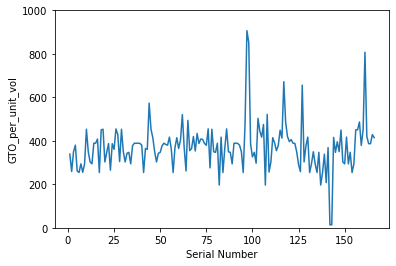

In [11]:
n = df_1.shape[0] + 1
# x axis values
x = list(range(1, n))
# corresponding y axis values
y = df_1.GTO_per_unit_vol
 

plt.ylim([0, 1000])

# plotting the points
plt.plot(x, y)
 
# naming the x axis
plt.xlabel('Serial Number')
# naming the y axis
plt.ylabel('GTO_per_unit_vol')
 
# function to show the plot
plt.show()

In [12]:
df_1_high = df_1.loc[df_1["GTO_per_unit_vol"] >= 414.450000]
df_1_high.shape

(44, 11)

In [13]:
X = data.drop("Discount_Total", axis = 1) 
y = data["Discount_Total"]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=1)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
regr = LinearRegression()
regr.fit(X, y)

LinearRegression()

In [18]:
from sklearn.metrics import mean_squared_error
r2_score = regr.score(X,y)

print(r2_score)

0.3846849178495474
